### AccelerateAI - Python - Machine Learning

In this Notebook we will cover the following Machine Learning libraries 
- ScikitLearn
- PyCaret
- StatsModels 

##### Machine Learning: 
    
A machine learning project ( though iterative in nature) has a number of well known steps:
- Define Problem
- Prepare Data
- Train Algorithms
- Evaluate Algorithms
- Improve Results
- Predict / Deploy 

### 1. Regression 

##### About the diabetes dataset
Ten baseline variables were obtained for each of n = 442 diabetes patients, 
as well as the response of interest, a quantitative measure of disease progression one year after baseline.
Variables: 
- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level <br>
Each of these 10 feature variables have been mean centered and scaled by the standard deviation

Task: Predict the disease progression based on predictor variables.

##### 1. Sklearn modeling 

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)         #returns a tuple

print(diabetes_X[:2])
print(diabetes_y[:2])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
[151.  75.]


In [3]:
# Split the data into training/testing sets
(diabetes_X_train, diabetes_X_test, 
diabetes_y_train, diabetes_y_test  ) = train_test_split(diabetes_X, diabetes_y, 
                                                        test_size=0.2, 
                                                        random_state=100)

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
reg_model = regr.fit(diabetes_X_train, diabetes_y_train)

In [5]:
# Make predictions using the testing set
diabetes_y_pred = reg_model.predict(diabetes_X_test)

In [6]:
# The coefficients
print("Coefficients: \n", reg_model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


print("Explained variance: %.2f" % explained_variance_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ -56.33541735 -221.15187831  545.39513939  333.32016358 -826.94615703
  535.43545737  138.16986492  142.31707976  809.68356442   48.22975786]
Mean squared error: 2634.82
Coefficient of determination: 0.50
Explained variance: 0.51


##### 2. Pycaret modeling 

In [8]:
from pycaret.regression import *

C:\Users\sachi\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\sachi\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})
C:\Users\sachi\Anaconda3\lib\site-packages\pycaret\loggers\mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


In [10]:
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [58]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [59]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [11]:
df=pd.concat([X,y],axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [12]:
grid = setup(data = df, target ='target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Original Data,"(442, 11)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(309, 10)"


In [13]:
reg_model2 = create_model('lr')

In [14]:
# The coefficients
print("Coefficients: \n", reg_model2.coef_)

Coefficients: 
 [  10.454003  538.84576   280.72556  -855.2123    472.17035   166.51773
  309.88766   684.04785   102.37714    24.894958]


In [15]:
tune_model(reg_model2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

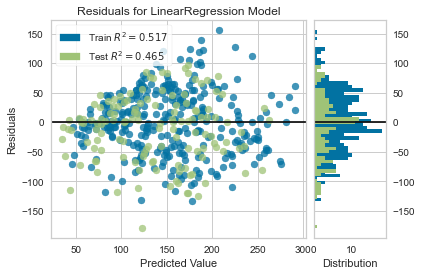

In [68]:
plot_model(reg_model2)

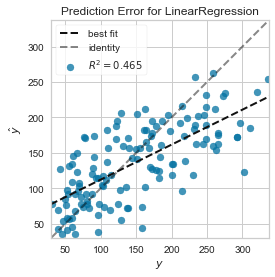

In [69]:
plot_model(reg_model2, plot = 'error')

In [70]:
# Predict on test dataset
predict_model(reg_model2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,44.1304,3182.9656,56.4178,0.4648,0.4251,0.3532


,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_-0.044641636312007904,target,Label
0,0.005383,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038393,-0.013504,0.0,185.0,160.551239
1,-0.009147,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633,0.0,150.0,155.907623
2,0.045341,0.039062,0.045972,0.006687,-0.024174,0.008142,-0.012556,0.064328,0.056912,0.0,246.0,203.965271
3,-0.063635,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025952,-0.054925,0.0,184.0,143.468475
4,0.052606,-0.024529,0.056301,-0.007073,-0.005072,-0.021311,-0.002592,0.026714,-0.038357,0.0,110.0,156.161743
...,...,...,...,...,...,...,...,...,...,...,...,...
128,-0.045472,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,0.0,138.0,72.503891
129,0.034443,0.018584,0.056301,0.012191,-0.054549,-0.069172,0.071210,0.130081,0.007207,0.0,273.0,229.639618
130,0.056239,-0.057941,-0.007966,0.052093,0.049103,0.056003,-0.021412,-0.028320,0.044485,0.0,158.0,73.011726
131,0.110727,-0.033151,-0.022885,-0.004321,0.020293,-0.061809,0.071210,0.015567,0.044485,0.0,168.0,156.499283


In [16]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,44.7524,3076.4369,55.2473,0.4573,0.4214,0.4005,0.0160
lr,Linear Regression,44.6490,3077.7069,55.2308,0.4555,0.4267,0.4002,0.0170
huber,Huber Regressor,44.9516,3131.8982,55.6860,0.4442,0.4259,0.3995,0.0320
par,Passive Aggressive Regressor,46.6473,3223.5450,56.5368,0.4371,0.4254,0.4106,0.0190
et,Extra Trees Regressor,46.3809,3249.2728,56.7931,0.4292,0.4332,0.4136,0.2150
rf,Random Forest Regressor,46.9666,3340.5051,57.5415,0.4128,0.4336,0.4148,0.2420
ada,AdaBoost Regressor,47.6536,3452.6915,58.3637,0.4038,0.4436,0.4386,0.0550
ridge,Ridge Regression,49.8459,3515.4887,59.0568,0.3893,0.4482,0.4556,0.0170
lightgbm,Light Gradient Boosting Machine,46.6187,3503.5815,58.7862,0.3892,0.4417,0.4094,0.2960
knn,K Neighbors Regressor,47.5040,3584.2837,59.3923,0.3806,0.4424,0.4099,0.0320


##### 3. Statsmodel 

In [17]:
 import statsmodels.api as sm

In [18]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) 

In [19]:
diabetes_X = sm.add_constant(diabetes_X, prepend=False)              # add constant for intercept  

In [20]:
diabetes_X[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613,
         1.        ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405,
         1.        ],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034,
         1.        ],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191,
         1.        ],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087,
         1.        ]])

In [21]:
# Define and Fit the OLS model
reg_model3 = sm.OLS(diabetes_y, diabetes_X)            
result = reg_model3.fit()

In [22]:
# Summarize the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        20:33:58   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -10.0122     59.749     -0.168      0.8

In [23]:
y_pred = result.predict(diabetes_X)
print(y_pred[:5])

[206.11706979  68.07234761 176.88406035 166.91796559 128.45984241]


### 2. Classification 

##### About the IRIS dataset 

This data sets consists of 3 different types of Irises:
   - Setosa, 
   - Versicolour
   - Virginica

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

Task: Classify the flowers into its correct species based on the sepal and petal dimensions. 

##### 1. Sklearn 

In [125]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [168]:
# Load the iris dataset
iris_data = datasets.load_iris(as_frame=True)         

In [169]:
X = iris_data.data
y = iris_data.target

In [170]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [171]:
# Train the model 
forest = RandomForestClassifier(random_state=1)
rf_model = forest.fit(X_train, y_train)

In [172]:
y_pred = rf_model.predict(X_test)

# test accuracy
print(metrics.accuracy_score(Y_test, y_pred))

0.9333333333333333


In [173]:
pd.DataFrame([y_pred, y_test], index=["Pred", "Actual"])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Pred,1,2,2,1,0,1,1,0,0,1,...,0,1,0,2,0,0,0,2,2,0
Actual,1,2,2,1,0,2,1,0,0,1,...,0,2,0,2,0,0,0,2,2,0


##### 2. Pycaret 

In [161]:
# Pycaret 
from pycaret.classification import *

In [174]:
X = iris_data.data
y = iris_data.target

In [175]:
df=pd.concat([X,y],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [177]:
grid = setup(data = df, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [179]:
rf_model2 = create_model("rf")

In [178]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9809,0.9969,0.9833,0.9857,0.9809,0.9715,0.9739,0.0090
knn,K Neighbors Classifier,0.9800,0.9830,0.9806,0.9800,0.9800,0.9697,0.9697,0.0550
qda,Quadratic Discriminant Analysis,0.9709,0.9969,0.9750,0.9782,0.9709,0.9566,0.9602,0.0090
lr,Logistic Regression,0.9609,0.9921,0.9611,0.9622,0.9596,0.9403,0.9422,0.7610
nb,Naive Bayes,0.9609,0.9938,0.9611,0.9652,0.9605,0.9407,0.9432,0.0080
gbc,Gradient Boosting Classifier,0.9609,0.9782,0.9611,0.9723,0.9579,0.9402,0.9476,0.0710
dt,Decision Tree Classifier,0.9509,0.9616,0.9500,0.9598,0.9479,0.9249,0.9309,0.0060
et,Extra Trees Classifier,0.9509,0.9890,0.9528,0.9532,0.9509,0.9258,0.9269,0.1960
rf,Random Forest Classifier,0.9409,0.9875,0.9417,0.9422,0.9396,0.9100,0.9119,0.2090
ada,Ada Boost Classifier,0.9409,0.9895,0.9417,0.9467,0.9391,0.9100,0.9146,0.0340


In [12]:
import numpy as np
arr = np.arange(9).reshape(3,3, order='F')
arr.max(axis=0) 

array([2, 5, 8])